In [1]:
import sys
import glob
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Add parent directory to Python path to find local modules
sys.path.insert(0, '..')

In [3]:
from utils.utils import parse_nccl_log, parse_multiple_logs, performance_data_to_dataframe

In [4]:
from utils.plotting import plot_nccl_performance, plot_nccl_comparison_matrix

## Input files

In [5]:
log_files = glob.glob('../logs/jun4-3/slurm-*.out')

In [6]:
log_files

['../logs/jun4-3/slurm-1046091.out',
 '../logs/jun4-3/slurm-39340641.out',
 '../logs/jun4-3/slurm-39340627.out',
 '../logs/jun4-3/slurm-1046125.out',
 '../logs/jun4-3/slurm-39340629.out',
 '../logs/jun4-3/slurm-1046128.out',
 '../logs/jun4-3/slurm-39340625.out',
 '../logs/jun4-3/slurm-1046103.out',
 '../logs/jun4-3/slurm-1046130.out',
 '../logs/jun4-3/slurm-1046136.out',
 '../logs/jun4-3/slurm-1046133.out',
 '../logs/jun4-3/slurm-1046109.out',
 '../logs/jun4-3/slurm-1046135.out',
 '../logs/jun4-3/slurm-39340633.out',
 '../logs/jun4-3/slurm-1046113.out',
 '../logs/jun4-3/slurm-39340643.out',
 '../logs/jun4-3/slurm-1046099.out',
 '../logs/jun4-3/slurm-1046108.out',
 '../logs/jun4-3/slurm-1046104.out',
 '../logs/jun4-3/slurm-39340635.out',
 '../logs/jun4-3/slurm-1046090.out',
 '../logs/jun4-3/slurm-39340638.out',
 '../logs/jun4-3/slurm-39340628.out',
 '../logs/jun4-3/slurm-1046119.out',
 '../logs/jun4-3/slurm-1046092.out',
 '../logs/jun4-3/slurm-1046105.out',
 '../logs/jun4-3/slurm-104613

## Extract performance data

In [7]:
all_perf_data = [parse_nccl_log(log_file) for log_file in log_files]

In [8]:
perf_df = performance_data_to_dataframe(all_perf_data)

In [10]:
perf_df

,jobid,nccl_version,nccl_algo,uses_alt_read,num_nodes,num_gpus,avg_bus_bandwidth,size_bytes,count_elements,type,redop,root,oop_time_us,oop_algbw_gbps,oop_busbw_gbps,oop_wrong,ip_time_us,ip_algbw_gbps,ip_busbw_gbps,ip_wrong
0,1046091,2.19.4,Tree,True,2,8,49.6012,32768,8192,float,sum,-1,47.13,0.70,1.22,0,41.54,0.79,1.38,0
1,1046091,2.19.4,Tree,True,2,8,49.6012,65536,16384,float,sum,-1,54.83,1.20,2.09,0,48.88,1.34,2.35,0
2,1046091,2.19.4,Tree,True,2,8,49.6012,131072,32768,float,sum,-1,67.63,1.94,3.39,0,61.48,2.13,3.73,0
3,1046091,2.19.4,Tree,True,2,8,49.6012,262144,65536,float,sum,-1,87.38,3.00,5.25,0,79.40,3.30,5.78,0
4,1046091,2.19.4,Tree,True,2,8,49.6012,524288,131072,float,sum,-1,101.70,5.16,9.02,0,103.60,5.06,8.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,39340630,2.21.5,Tree,False,32,128,25.2305,268435456,67108864,float,sum,-1,9864.30,27.21,54.00,0,9886.60,27.15,53.88,0
1256,39340630,2.21.5,Tree,False,32,128,25.2305,536870912,134217728,float,sum,-1,18690.00,28.73,57.00,0,18415.00,29.15,57.85,0
1257,39340630,2.21.5,Tree,False,32,128,25.2305,1073741824,268435456,float,sum,-1,35781.00,30.01,59.55,0,35791.00,30.00,59.53,0
1258,39340630,2.21.5,Tree,False,32,128,25.2305,2147483648,536870912,float,sum,-1,70509.00,30.46,60.44,0,70625.00,30.41,60.34,0


## Visualizations

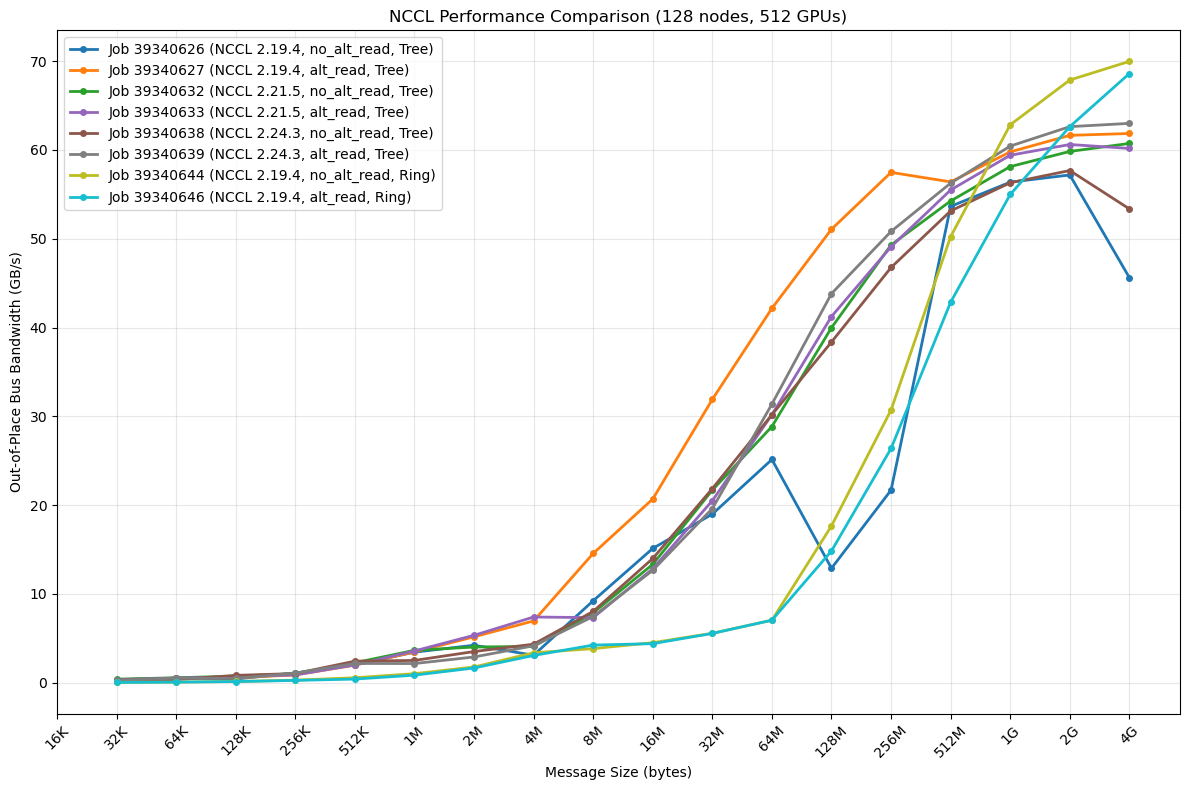

In [19]:
# All results for 512 nodes
plot_nccl_performance(perf_df, target_num_nodes=128);

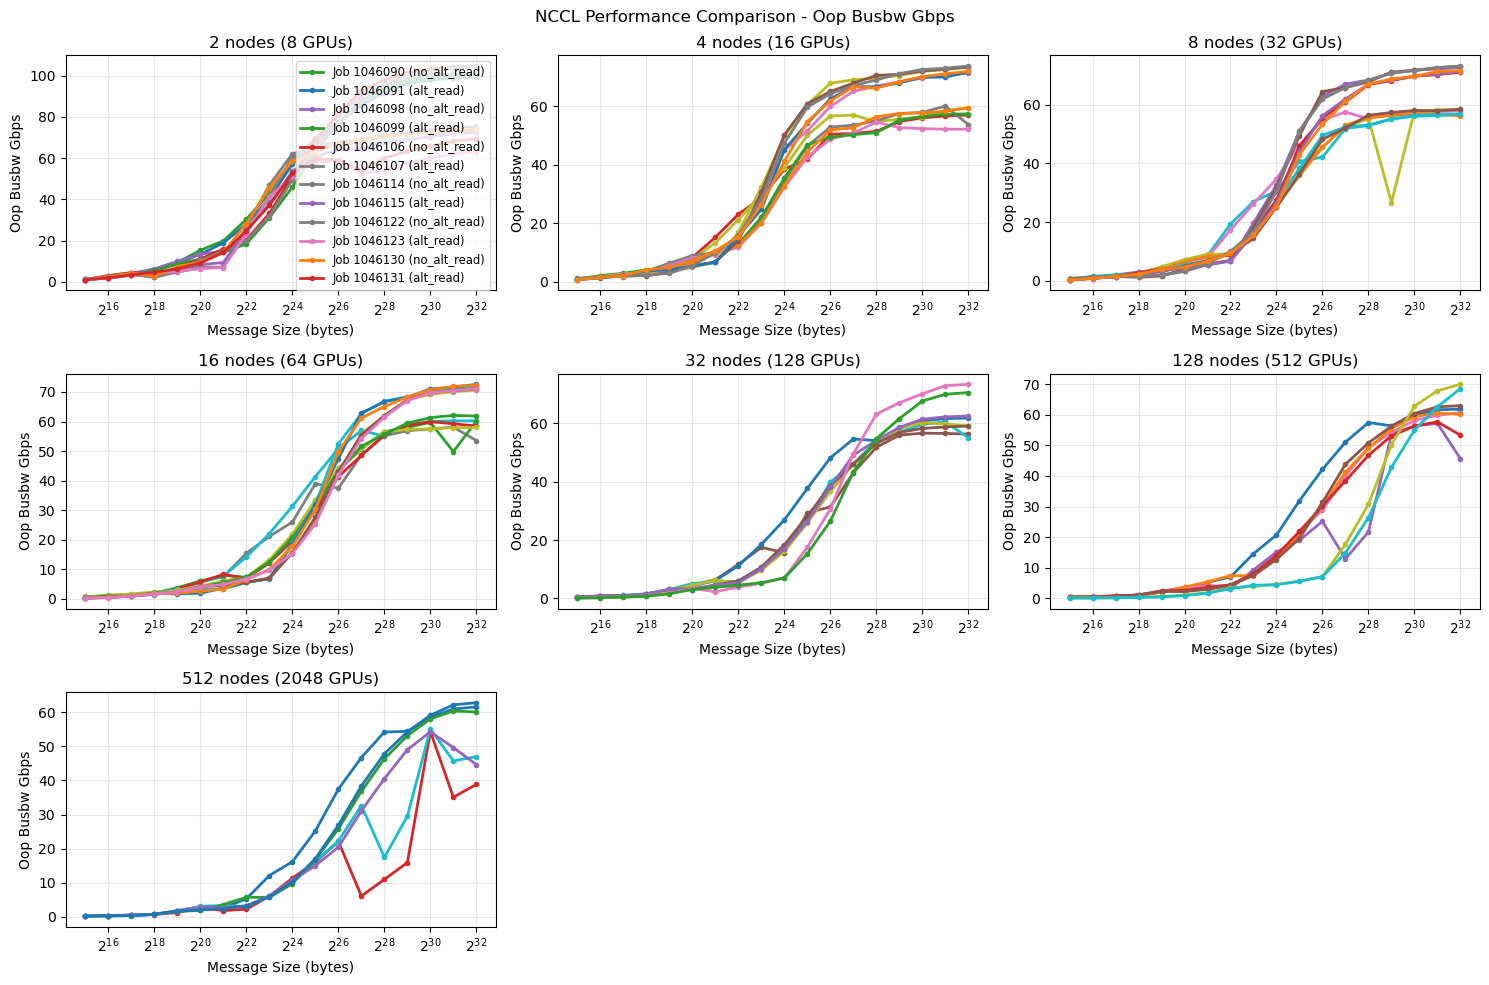

In [12]:
plot_nccl_comparison_matrix(perf_df);